# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


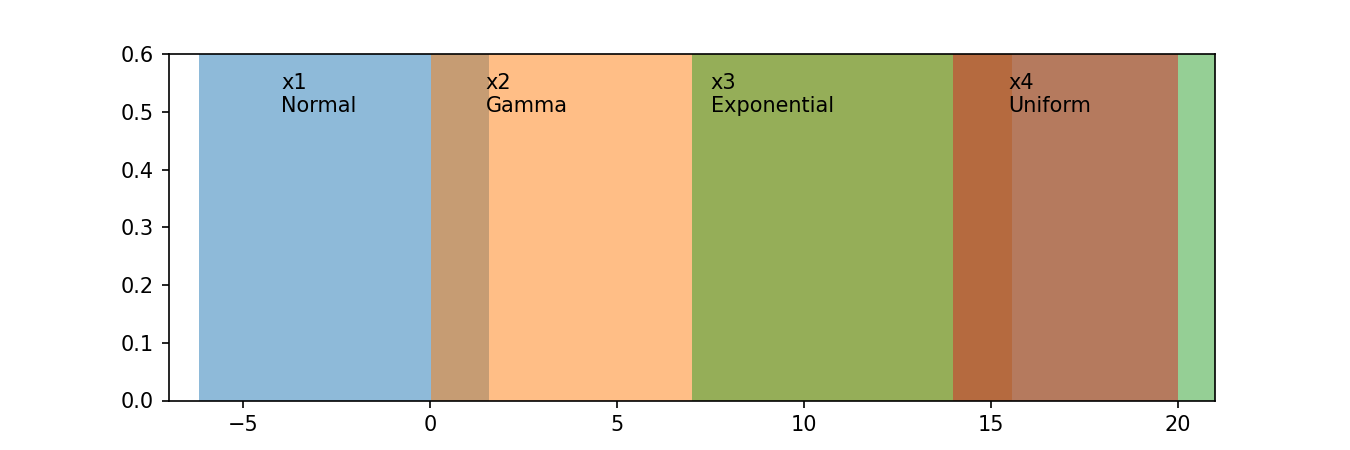

Text(15.460650752253517, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, bins=20, alpha=0.5)
plt.hist(x2, bins=20, alpha=0.5)
plt.hist(x3, bins=20, alpha=0.5)
plt.hist(x4, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


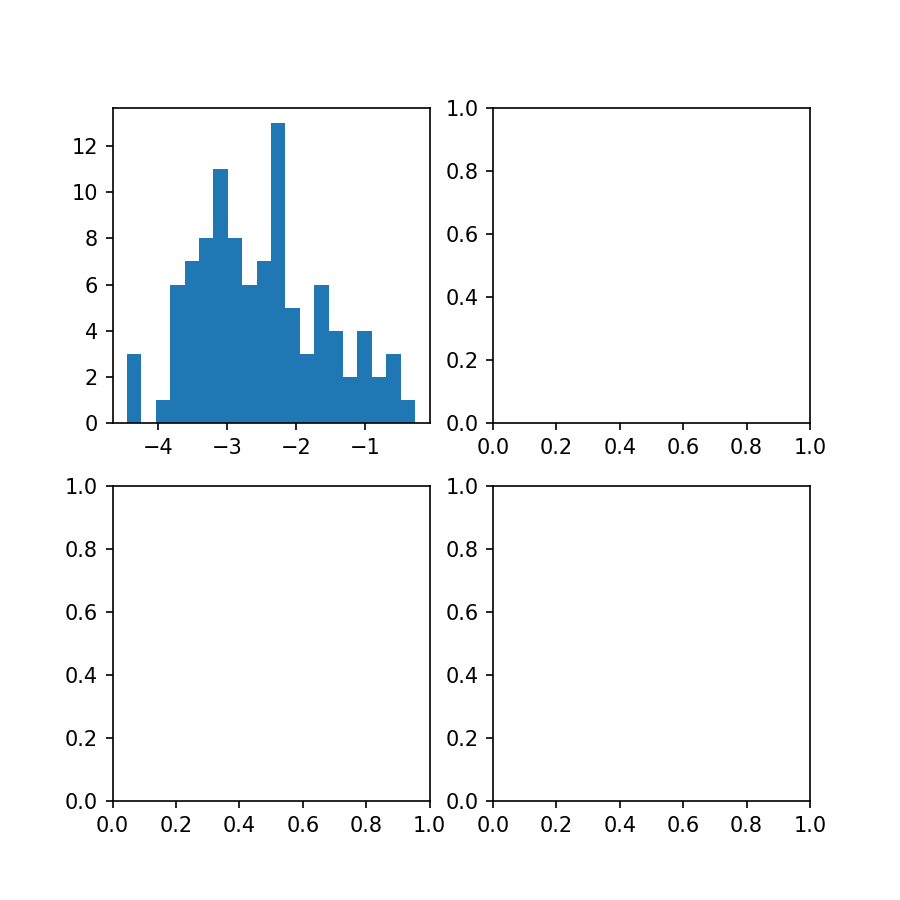

In [4]:
import matplotlib.animation as animation


x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

def update(curr):
    
    N = curr * 100 + 100
    
    if N >= 10000:
        a.event_source.stop()
        
    xx1 = np.random.choice(x1, size=(N,1))
    xx2 = np.random.choice(x2, size=(N,1))
    xx3 = np.random.choice(x3, size=(N,1))
    xx4 = np.random.choice(x4, size=(N,1))
    
    ax[0][0].clear()
    ax[0][1].clear()
    ax[1][0].clear()
    ax[1][1].clear()
    
    ax[0][0].hist(xx1, normed=True, bins=20, alpha=0.5);
    ax[0][1].hist(xx2, normed=True, bins=20, alpha=0.5);
    ax[1][0].hist(xx3, normed=True, bins=20, alpha=0.5);
    ax[1][1].hist(xx4, normed=True, bins=20, alpha=0.5);

    ax[0][0].set_title('x1\nNormal %d' % (N))
    ax[0][1].set_title('x2\nGamma %d' % (N))
    ax[1][0].set_title('x3\nExponential %d' % (N))
    ax[1][1].set_title('x4\nUniform %d' % (N))

    fig.tight_layout()
    
fig, ax = plt.subplots(2, 2, figsize=(6,6))
a = animation.FuncAnimation(fig, update, interval=10)

In [5]:
# converting to an html5 video
video = a.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)

RuntimeError: Requested MovieWriter (ffmpeg) not available